In [2]:

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np
from torchvision import datasets, transforms
import torch.nn.functional as F

from AgeDatasetLoader import AgeDataset

In [3]:
USE_GPU = True
num_class = 100
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [4]:
age_train = AgeDataset("age_data/age-train.csv")
loader_train = DataLoader(age_train, batch_size=32, shuffle=True, num_workers=2)

age_val = AgeDataset("age_data/age-val.csv")
loader_val = DataLoader(age_val, batch_size=32, shuffle=True, num_workers=2)


age_test = AgeDataset("age_data/age-test.csv")
loader_test = DataLoader(age_test, batch_size=32, shuffle=True, num_workers=2)

In [5]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [6]:
# instantiate the model
n_inputs = 48*48 # makes a 1D vector of 784
n_outputs = 24
log_regr = LogisticRegression(n_inputs, n_outputs)

In [7]:
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining CrossaEntropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(loader_train):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 48*48))
        loss = criterion(outputs, labels)
        #loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    total = 0
    for images, labels in loader_test:
        outputs = log_regr(images.view(-1, 48*48))
        _, predicted = torch.max(outputs.data, 1)
       # correct += (predicted == labels).sum()
  
        correct += (predicted == labels).sum().item() # Convert labels to indices
        total += labels.size(0)
    accuracy = (correct) / total
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 9726.55859375. Accuracy: 0.26462317210348707
Epoch: 1. Loss: 10252.9921875. Accuracy: 0.14651293588301462
Epoch: 2. Loss: 9769.8076171875. Accuracy: 0.1470753655793026
Epoch: 3. Loss: 6808.5478515625. Accuracy: 0.1965691788526434
Epoch: 4. Loss: 9732.63671875. Accuracy: 0.2218785151856018
Epoch: 5. Loss: 8895.134765625. Accuracy: 0.16338582677165353
Epoch: 6. Loss: 7712.45703125. Accuracy: 0.2612485939257593
Epoch: 7. Loss: 11172.6083984375. Accuracy: 0.1796962879640045
Epoch: 8. Loss: 9995.74609375. Accuracy: 0.1639482564679415
Epoch: 9. Loss: 2910.676025390625. Accuracy: 0.16451068616422948
Epoch: 10. Loss: 6629.6103515625. Accuracy: 0.14763779527559054
Epoch: 11. Loss: 3878.77197265625. Accuracy: 0.13976377952755906
Epoch: 12. Loss: 4272.4462890625. Accuracy: 0.17772778402699663
Epoch: 13. Loss: 5241.02197265625. Accuracy: 0.27080989876265465
Epoch: 14. Loss: 4059.482421875. Accuracy: 0.1841957255343082
Epoch: 15. Loss: 6701.98974609375. Accuracy: 0.17154105736782901

In [8]:
for images, labels in loader_train:
    print(images.shape, labels.shape)
    break

torch.Size([32, 1, 48, 48]) torch.Size([32])


In [9]:
print(sum(acc)/len(acc))

0.22237345331833516


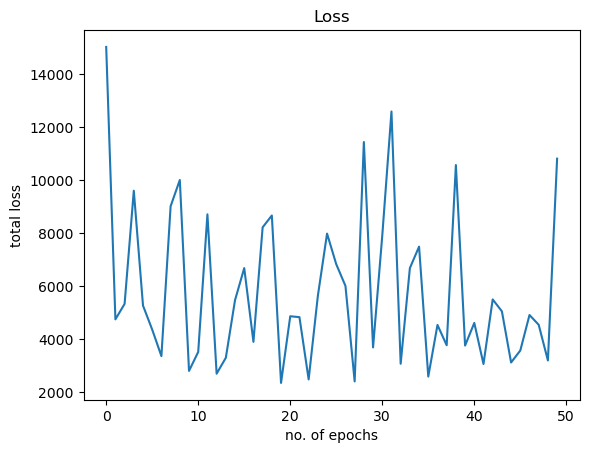

In [10]:
import matplotlib.pyplot as plt

plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

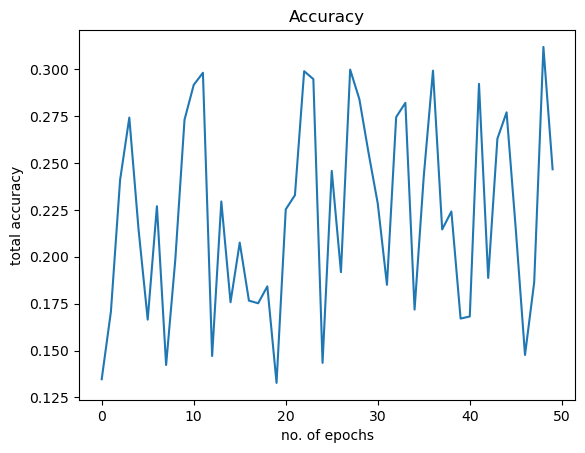

In [11]:

plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

In [10]:

def train(epochs, optimizer):
    Loss = []
    acc = []
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(loader_train):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 48*48))
            loss = criterion(outputs, labels)
            #loss = criterion(outputs, labels)
            # Loss.append(loss.item())
            loss.backward()
            optimizer.step()
        Loss.append(loss.item())
        correct = 0
        total = 0
        for images, labels in loader_test:
            outputs = log_regr(images.view(-1, 48*48))
            _, predicted = torch.max(outputs.data, 1)
           # correct += (predicted == labels).sum()
      
            correct += (predicted == labels).sum().item() # Convert labels to indices
            total += labels.size(0)
        accuracy = (correct) / total
        acc.append(accuracy)
       # print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))
    return acc, Loss

In [8]:
def validate(epochs, optimizer):
    Loss = []
    acc = []
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(loader_val):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 48*48))
            loss = criterion(outputs, labels)
            #loss = criterion(outputs, labels)
            # Loss.append(loss.item())
            loss.backward()
            optimizer.step()
        Loss.append(loss.item())
        correct = 0
        total = 0
        for images, labels in loader_test:
            outputs = log_regr(images.view(-1, 48*48))
            _, predicted = torch.max(outputs.data, 1)
           # correct += (predicted == labels).sum()
      
            correct += (predicted == labels).sum().item() # Convert labels to indices
            total += labels.size(0)
        accuracy = (correct) / total
        acc.append(accuracy)
       # print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))
    return acc, Loss

In [9]:
def test(epochs, optimizer):
    Loss = []
    acc = []
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(loader_test):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 48*48))
            loss = criterion(outputs, labels)
            #loss = criterion(outputs, labels)
            # Loss.append(loss.item())
            loss.backward()
            optimizer.step()
        Loss.append(loss.item())
        correct = 0
        total = 0
        for images, labels in loader_test:
            outputs = log_regr(images.view(-1, 48*48))
            _, predicted = torch.max(outputs.data, 1)
           # correct += (predicted == labels).sum()
      
            correct += (predicted == labels).sum().item() # Convert labels to indices
            total += labels.size(0)
        accuracy = (correct) / total
        acc.append(accuracy)
       # print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))
    return acc, Loss

In [16]:
epochs = 50
# defining the optimizer
optimizer = torch.optim.Adam(log_regr.parameters(), lr=0.001)
# defining CrossaEntropy loss
criterion = torch.nn.CrossEntropyLoss()

acc, Loss = train(epochs, optimizer)
print(acc[epochs-1])


0.28768278965129357


In [20]:
#Tuning learning_rate 


accuracy_values = []
lr_values = []

for i in range(1,7):

    lr_hp = 10 ** (-1*i)

    # defining the optimizer
    optimizer = torch.optim.Adam(log_regr.parameters(), lr=lr_hp)
    # defining CrossaEntropy loss
    criterion = torch.nn.CrossEntropyLoss()

    epochs = 10
  
    acc, Loss = train(epochs,optimizer)
    acc = acc[epochs-1]
    print("lr ",lr_hp,"acc ", acc)
    accuracy_values.append(acc)
    lr_values.append(lr_hp)

lr  0.1 acc  0.21822272215973004
lr  0.01 acc  0.27137232845894266
lr  0.001 acc  0.296681664791901
lr  0.0001 acc  0.2888076490438695
lr  1e-05 acc  0.29274465691788526
lr  1e-06 acc  0.29358830146231724


The ideal learning rate was found to be 1e-06

In [22]:
#Tuning weight_decay


accuracy_values = []
wd_values = []

for i in range(1,7):

    wd_hp = 10 ** (-1*i)

    # defining the optimizer
    optimizer = torch.optim.Adam(log_regr.parameters(), lr=0.000001, weight_decay=wd_hp)
    # defining CrossaEntropy loss
    criterion = torch.nn.CrossEntropyLoss()

    epochs = 10
    print_every = 5000
    acc, Loss = train(epochs,optimizer)
    acc = acc[epochs-1]
    print("weight_decay",wd_hp,"acc", acc)
    accuracy_values.append(acc)
    wd_values.append(wd_hp)

weight_decay 0.1 acc 0.2941507311586052
weight_decay 0.01 acc 0.29443194600674916
weight_decay 0.001 acc 0.29471316085489313
weight_decay 0.0001 acc 0.29471316085489313
weight_decay 1e-05 acc 0.29443194600674916
weight_decay 1e-06 acc 0.2938695163104612


The optimal the weight decay was found to be 0.001 or 0.0001 with identical accuracies

In [23]:
#Tuning epochs


accuracy_values = []
epoch_values = []

for i in range(10,100,20):

    epochs = i

    # defining the optimizer
    optimizer = torch.optim.Adam(log_regr.parameters(), lr=0.000001, weight_decay=0.0001)
    # defining CrossaEntropy loss
    criterion = torch.nn.CrossEntropyLoss()
    print_every = 5000
    acc, Loss = train(epochs,optimizer)
    acc = acc[epochs-1]
    print("epochs",epochs,"acc", acc)
    accuracy_values.append(acc)
    epoch_values.append(epochs)

epochs 10 acc 0.2938695163104612
epochs 30 acc 0.2938695163104612
epochs 50 acc 0.2938695163104612
epochs 70 acc 0.29443194600674916
epochs 90 acc 0.29443194600674916


In [ ]:
The optimal epoch value was found to be 70-90 epochs.

Visualizations

In [11]:
# defining the optimizer
epochs = 10
optimizer = torch.optim.Adam(log_regr.parameters(), lr=0.000001, weight_decay=0.0001)
# defining CrossaEntropy loss
criterion = torch.nn.CrossEntropyLoss()

train_acc, train_Loss = train(epochs,optimizer)
acc = train_acc[epochs-1]
print("epochs",epochs,"train acc", acc)



epochs 10 train acc 0.11923509561304838


In [ ]:
test_acc, test_Loss = test(epochs,optimizer)
acc = train_acc[epochs-1]
print("epochs",epochs,"test acc", acc)

epochs 10 test acc 0.11923509561304838


In [ ]:
val_acc, val_Loss = validate(epochs,optimizer)
acc = train_acc[epochs-1]
print("epochs",epochs,"val acc", acc)

epochs 10 val acc 0.11923509561304838


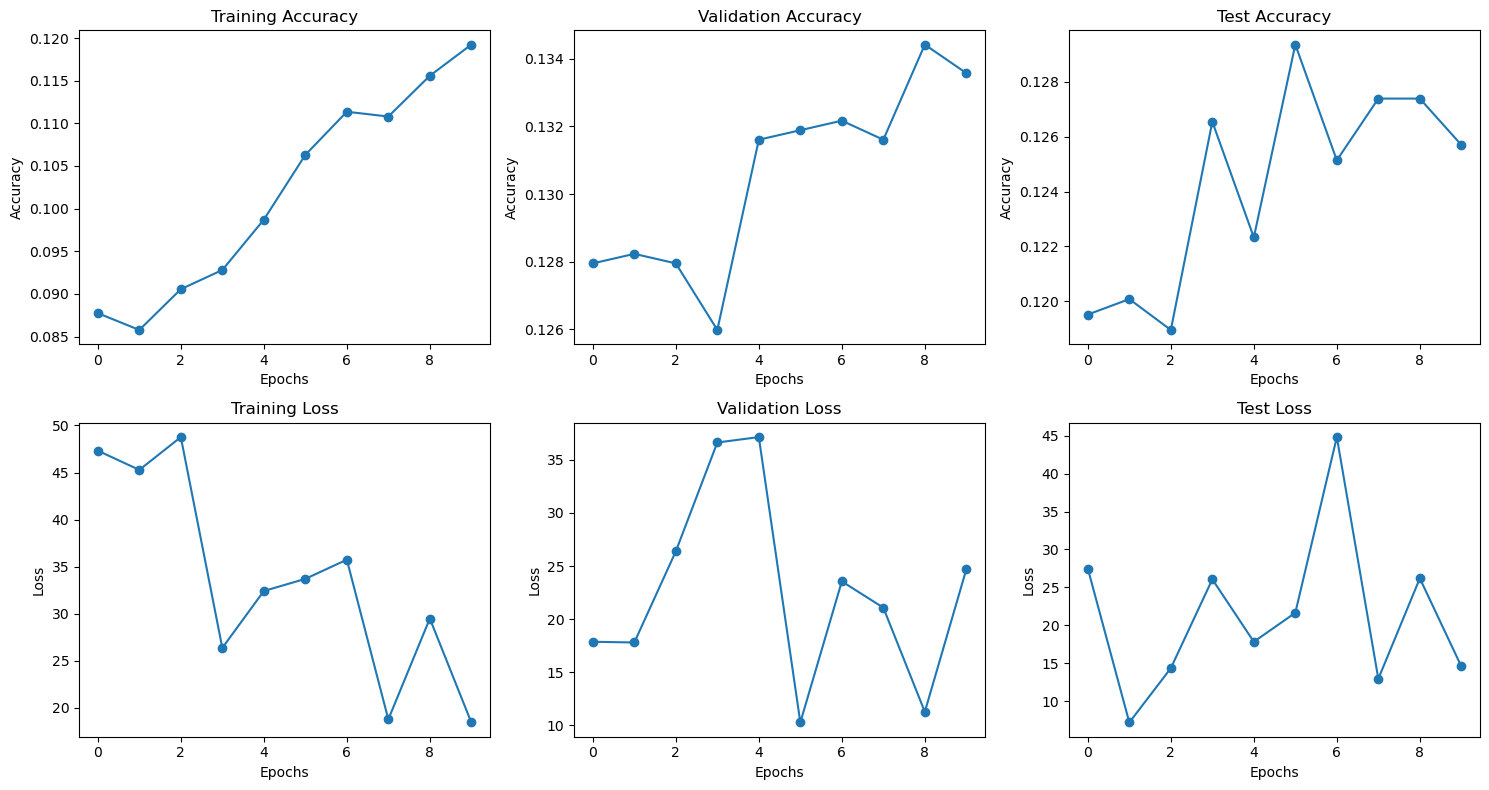

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.plot(train_acc, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')


plt.subplot(2, 3, 2)
plt.plot(val_acc, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')



plt.subplot(2, 3, 3)
plt.plot(test_acc, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')


plt.subplot(2, 3, 4)
plt.plot(train_Loss, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')



plt.subplot(2, 3, 5)
plt.plot(val_Loss, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')

plt.subplot(2, 3, 6)
plt.plot(test_Loss, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')



plt.tight_layout()
plt.show()